In [1]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
import binascii
import os
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import librosa
import librosa.display
import librosa.core
import numpy as np
os.getcwd()

ModuleNotFoundError: No module named 'scipy'

In [45]:
# read audio samples
y,sr = librosa.load("..\\audiosamples\\waves\\Hello-2-20-T5.wav", mono=True)
print(type(y), type(sr))
totalsamples = len(y)
totaltime_s = totalsamples/sr

<class 'numpy.ndarray'> <class 'int'>


In [46]:
print(sr)
print(y.shape, sr)
print(totaltime_s)

22050
(5134734,) 22050
232.8677551020408


In [47]:
y

array([-0.09501696, -0.10123488, -0.0680607 , ..., -0.0839906 ,
       -0.10111001,  0.        ], dtype=float32)

In [48]:
len(y)

5134734

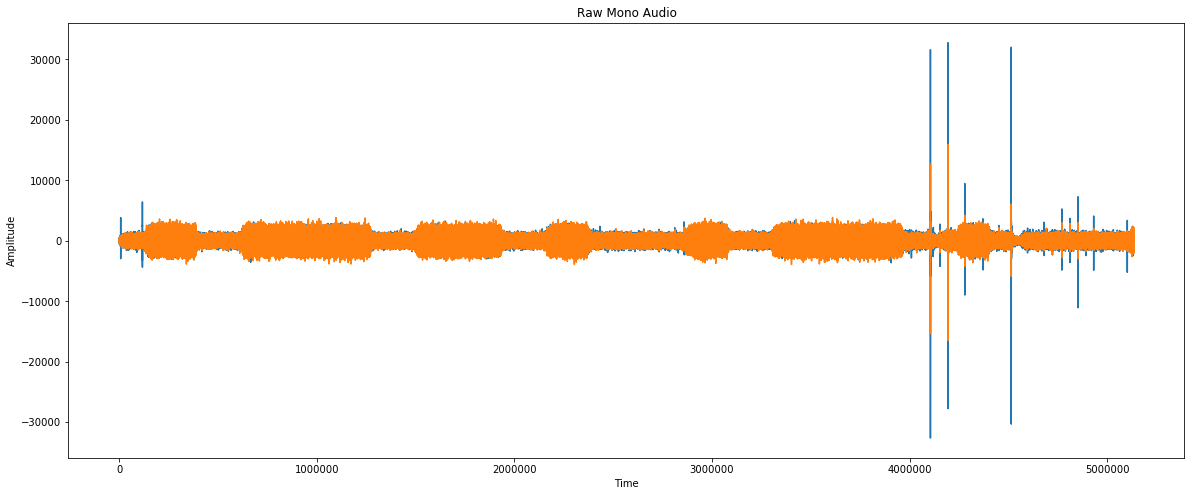

In [49]:
#plotting initial samples
plt.figure(figsize=(20, 8))
plt.plot(sampledata[0:totalsamples-1])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Raw Mono Audio")
plt.show()

In [50]:
#change values to postive values

sampledata = np.absolute(sampledata)

MemoryError: Unable to allocate 78.3 MiB for an array with shape (5134733, 2) and data type float64

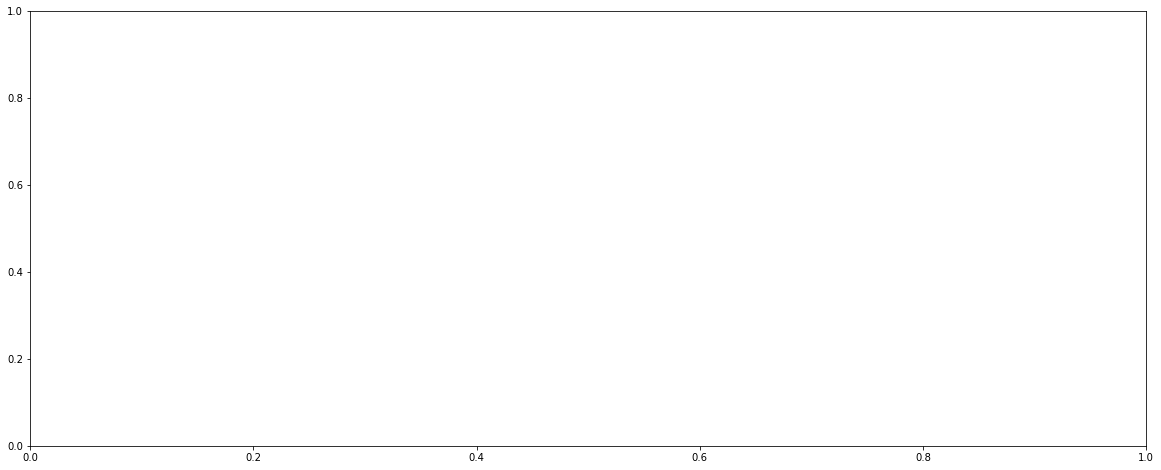

In [52]:
##abs value plot
plt.figure(figsize=(20, 8))
plt.plot(sampledata[0:totalsamples-1])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Absolute Raw Audio")
plt.show()

MemoryError: Unable to allocate 39.2 MiB for an array with shape (5134733,) and data type float64

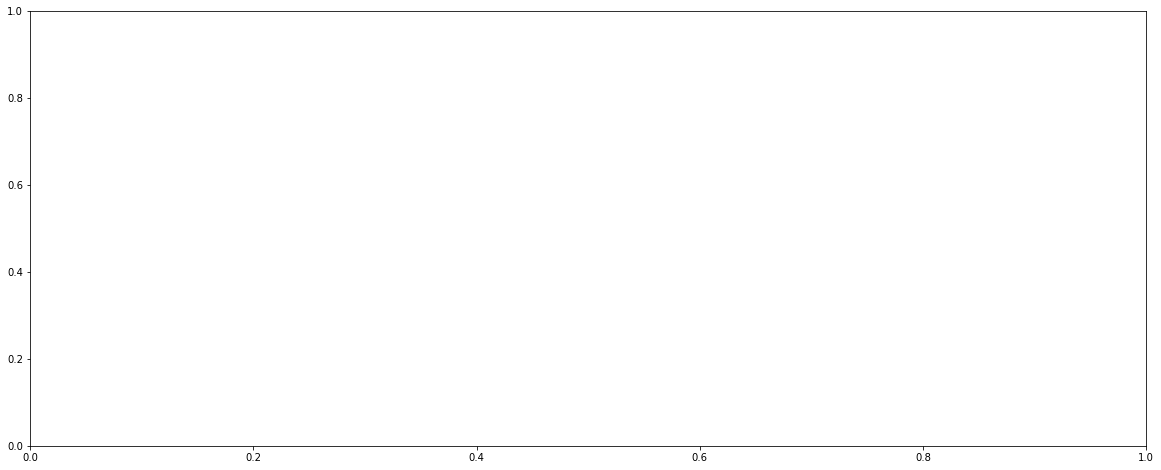

In [54]:
# grab mean of data for later use

average_amplitude = np.mean(sampledata)

# Transform data to a mean across a specific period (non moving mean)

# seconds used for data transmit in bits per second in transmit file 
seconds = 4

#seconds converted to a value of total samples
window = seconds * samplerate

#calculate number of windows in dataset
total_windows = totalsamples/window
#run through data set and set values in each window equal to the mean of the window
i = 0
s = 0
f = window
while i < total_windows:
    average = np.mean(sampledata[s:f])
    sampledata[s:f] = average
    s+=window
    f+=window
    i+=1

# Make equal to the period of listening need to find a way to get close to the begining like a start signal.....
##abs value plot
plt.figure(figsize=(20, 8))
plt.plot(sampledata[0:totalsamples-1])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Averaged Audio Across Period")
plt.show()

MemoryError: Unable to allocate 39.2 MiB for an array with shape (5134733,) and data type float64

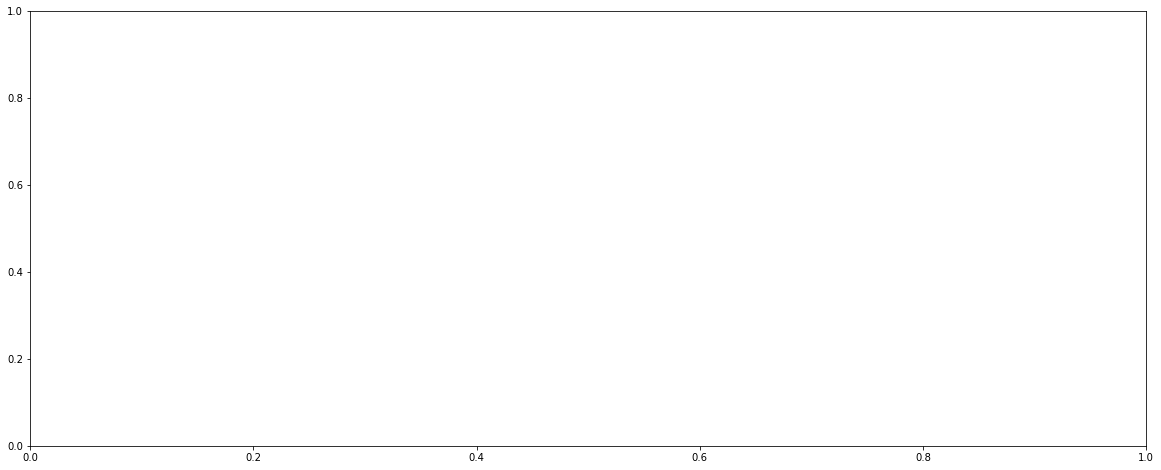

In [55]:
#then set all equal to specific averages.

sampledata[(sampledata < average_amplitude)] = 0
sampledata[(sampledata > average_amplitude)] = 1



##abs value plot
plt.figure(figsize=(20, 8))
plt.plot(sampledata[0:totalsamples-1])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Absolute Raw Audio")
plt.show()

In [56]:
#now need to turn that into 1 & 0
i = 0
halfp = int(window/2)
binString = ''
while i < total_windows:
    binString += str(sampledata[halfp-1])
    halfp+=window
    i+=1
binString    

'[0 0][1 1][0 0][0 0][1 1][1 1][1 1][0 0][0 0][1 1][1 1][0 0][1 1][0 0][0 0][0 0][1 1][0 0][0 0][1 1][1 1][1 1][0 0][0 0][1 1][0 0][0 0][0 0][0 0][1 1]'

In [1]:
len(binString)

NameError: name 'binString' is not defined

In [17]:
binascii.b2a_uu(binString)

TypeError: a bytes-like object is required, not 'str'